In [1]:
import pandas as pd


df_title_basics = pd.read_csv('../BD_A_IGNORE/title.basics.tsv.gz', compression = 'gzip', sep='\t', on_bad_lines='skip', na_values=['\\N'])
df_title_crew = pd.read_csv('../BD_A_IGNORE/title.crew.tsv.gz', compression = 'gzip', sep='\t', on_bad_lines='skip', na_values=['\\N'])
df_title_ratings = pd.read_csv('../BD_A_IGNORE/title.ratings.tsv.gz', compression = 'gzip', sep='\t', on_bad_lines='skip', na_values=['\\N'])



C:\Users\phili\AppData\Local\Temp\ipykernel_10788\2152287179.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_title_basics = pd.read_csv('../BD_A_IGNORE/title.basics.tsv.gz', compression = 'gzip', sep='\t', on_bad_lines='skip', na_values=['\\N'])


In [17]:
df_title_basics.drop(columns='endYear', inplace= True)

In [18]:
df_film1 = pd.merge(df_title_basics, df_title_crew, how="outer", on=['tconst'])
df_film_f = pd.merge(df_film1, df_title_ratings, how="outer", on= ['tconst'])

df_film_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11462155 entries, 0 to 11462154
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   tconst          object 
 1   titleType       object 
 2   primaryTitle    object 
 3   originalTitle   object 
 4   isAdult         float64
 5   startYear       float64
 6   runtimeMinutes  object 
 7   genres          object 
 8   directors       object 
 9   writers         object 
 10  averageRating   float64
 11  numVotes        float64
dtypes: float64(4), object(8)
memory usage: 1.0+ GB


In [19]:
df_film_f.sample(6)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,writers,averageRating,numVotes
8961374,tt4488394,short,Halloween Knight,Halloween Knight,0.0,2011.0,6.0,"Comedy,Crime,Short",nm2931491,"nm4589890,nm2931491",NaN,NaN
6363954,tt2642786,tvEpisode,Flying Demon,Flying Demon,0.0,2011.0,NaN,Adventure,NaN,NaN,7.2,9.0
10750364,tt8378558,tvEpisode,Episode dated 1 May 2018,Episode dated 1 May 2018,0.0,2018.0,NaN,"News,Talk-Show",NaN,NaN,NaN,NaN
8310950,tt33705966,tvEpisode,Episode #1.19,Episode #1.19,0.0,1957.0,30.0,Family,NaN,NaN,NaN,NaN
1944999,tt11703442,tvEpisode,Episode #7.8,Episode #7.8,0.0,2020.0,NaN,Comedy,nm2354990,"nm1440793,nm11551729,nm8409182,nm2346233,nm583...",NaN,NaN
3613977,tt1475099,movie,Antisex,Antisex,0.0,2008.0,74.0,"Comedy,Drama,Fantasy",nm0410730,"nm3543889,nm0410730",4.0,55.0


In [20]:
var1 = df_film_f.isnull().sum()

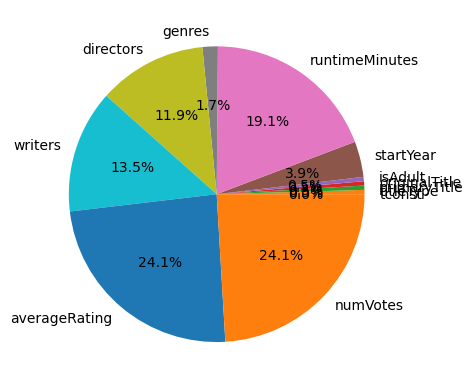

In [21]:
import matplotlib.pyplot as plt 

dfgraphe = pd.DataFrame(df_film_f.isnull().sum(), columns = ['count'])
dfgraphe['category'] = dfgraphe.index
dfgraphe.reset_index
dfgraphe

category = dfgraphe['category'].unique()

fig, ax = plt.subplots()
ax.pie(x= dfgraphe['count'], labels=category, autopct = '%1.1f%%');



In [22]:
dfgraphe.sample(3)

,count,category
numVotes,9957157,numVotes
startYear,1610711,startYear
tconst,0,tconst


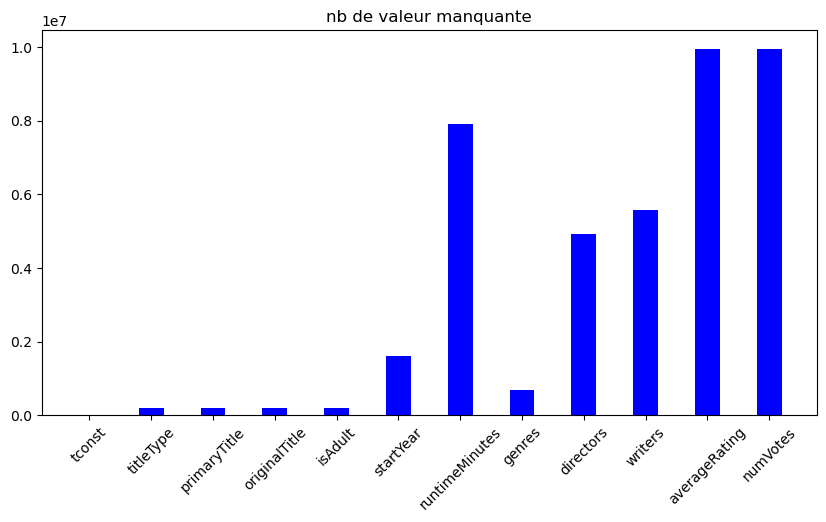

In [23]:
fig = plt.figure(figsize = (10, 5))
plt.bar(x= dfgraphe['category'], height =dfgraphe['count'], color='blue', width= 0.4);
plt.xticks(rotation=45)
plt.title('nb de valeur manquante')
plt.show()

In [24]:

dfgraphe

,count,category
tconst,0,tconst
titleType,193559,titleType
primaryTitle,193578,primaryTitle
originalTitle,193578,originalTitle
isAdult,193560,isAdult
startYear,1610711,startYear
runtimeMinutes,7904344,runtimeMinutes
genres,695119,genres
directors,4908097,directors
writers,5569063,writers


In [25]:
df_film_f['tconst'].nunique()

11462155

In [26]:
df_film_f.duplicated().sum()

0

In [27]:
#exploration colonne titleType


count = df_film_f['titleType'].value_counts()
count

titleType
tvEpisode       8656492
short           1030490
movie            698447
video            301210
tvSeries         273262
tvMovie          148993
tvMiniSeries      58137
tvSpecial         50440
videoGame         40651
tvShort           10473
tvPilot               1
Name: count, dtype: int64

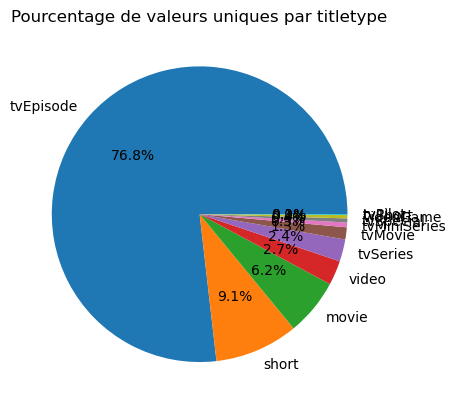

In [13]:
# category = df_film_f['titleType'].unique()

plt.pie(count, labels=count.index, autopct='%1.1f%%')
plt.title("Pourcentage de valeurs uniques par titletype")
plt.show()

In [14]:
df_film_f.info()
df_film_f.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11462155 entries, 0 to 11462154
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   tconst          object 
 1   titleType       object 
 2   primaryTitle    object 
 3   originalTitle   object 
 4   isAdult         float64
 5   startYear       float64
 6   endYear         float64
 7   runtimeMinutes  object 
 8   genres          object 
 9   directors       object 
 10  writers         object 
 11  averageRating   float64
 12  numVotes        float64
dtypes: float64(5), object(8)
memory usage: 1.1+ GB


Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres', 'directors',
       'writers', 'averageRating', 'numVotes'],
      dtype='object')

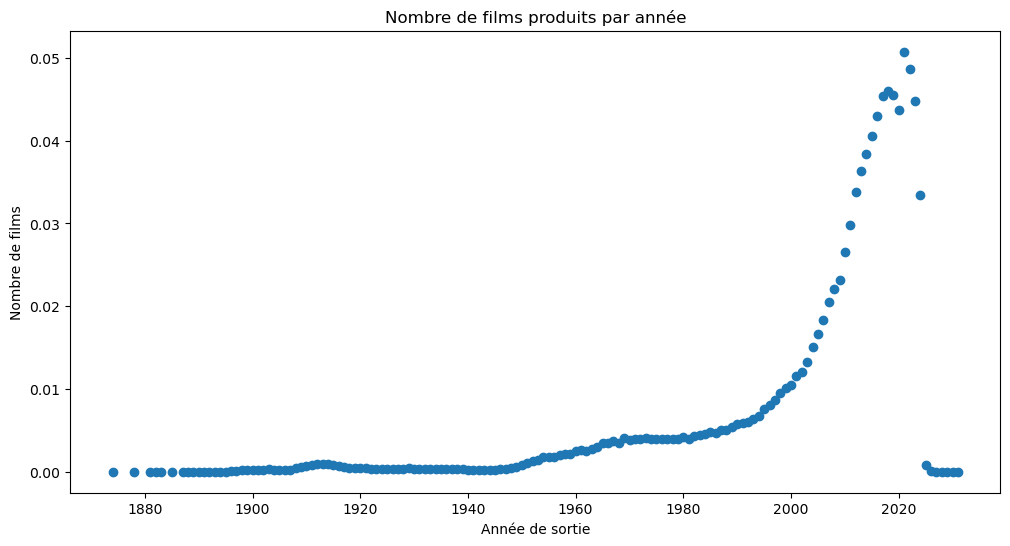

<class 'pandas.core.series.Series'>
Index: 151 entries, 2021.0 to 1885.0
Series name: proportion
Non-Null Count  Dtype  
--------------  -----  
151 non-null    float64
dtypes: float64(1)
memory usage: 2.4 KB


In [15]:
films_par_an = df_film_f['startYear'].value_counts('tconst')
plt.figure(figsize=(12, 6))
plt.scatter(x=films_par_an.index, y= films_par_an)
plt.xlabel('Année de sortie')
plt.ylabel('Nombre de films')
plt.title('Nombre de films produits par année')
plt.show()
films_par_an.info()

In [32]:

films_par_an = df_film_f.sample(n= 1000)

films_par_an.isna().sum()

# films_par_an['startYear'] = df_film_f['startYear'].astype(int, errors = "raise")

# nb = films_par_an.groupby('year').sum()

# nb
# films_par_an

tconst              0
titleType          16
primaryTitle       16
originalTitle      16
isAdult            16
startYear         128
runtimeMinutes    702
genres             67
directors         399
writers           464
averageRating     865
numVotes          865
dtype: int64

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(x=films_par_an['year'], height= nb)
plt.xlabel('Année de sortie')
plt.ylabel('Nombre de films')
plt.title('Nombre de films produits par année')
plt.show()
# films_par_an.info()

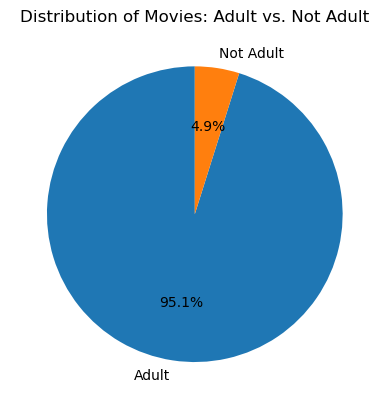

In [ ]:
df_film_f['isAdult'] = df_film_f['isAdult'].astype('bool')
df_film_f_filter = df_film_f['isAdult'].dropna()
adult_counts = df_film_f_filter.value_counts()
plt.pie(adult_counts, labels=['Adult', 'Not Adult'], autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Movies: Adult vs. Not Adult")
plt.show()

In [ ]:
# df_film_f['startYear'] = pd.to_datetime(df_film_f['startYear'], format='%Y', errors='coerce')
# df_film_f['endYear'] = pd.to_datetime(df_film_f['endYear'], format='%Y', errors='coerce')
# df_film_f['runtimeMinutes'] = df_film_f['runtimeMinutes'].astype('float')